<a href="https://colab.research.google.com/github/jgutier1/APP-MOVIL/blob/main/Gutierrez_Juan_S25_EA4_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Institución Universitaria Digital de Antioquia**

# **Ingeniería de Software y Datos**

# **Machine Learninig**

# **Profesora: Sharon Karin Camacho**

# **PREICA2501B010107**

# **EA4. MNIST desde cero**

# **Elaborado por: Juan Carlos Gutiérrez Riaño**

# **Fecha 5 Abril de 2025**

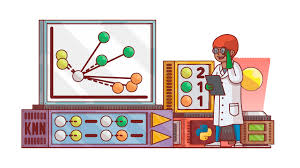

# **programación de redes neuronales clasificador para el conjunto de datos MNIST**

---



# **a - Implementación desde cero**


Desarrolla un clasificador para el conjunto de datos MNIST sin utilizar bibliotecas de alto nivel para redes neuronales. Esto implica programar manualmente las funciones necesarias para el procesamiento de datos, la construcción de la red neuronal, el entrenamiento y la evaluación del modelo.

Forward propagation (función de activación)
Medición y almacenamiento del error
Backpropagation (modificación y almacenamiento de pesos)
Dos iteraciones y selección del mejor pesos.

# **1- Carga de los datos,bibliotecas con su forma**

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split


# Cargar los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()




# **Ver forma de los datos**

conjunto de 60.000 imágenes a mano

10.000 imágenes prueba

imagen de 28x28 pixeles


In [223]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [224]:
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de X_test: (10000, 28, 28)
Forma de y_test: (10000,)


# **2- Dispongo a la Normalizacion de datos (de 0-255 a 0-1)**

 28x28 en vectores

 vector de  784 valores

 normaliza los píxeles entre 0 y 1


In [225]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# **3- se realiza la red neuronal basica 5000 datos**

In [226]:
X_train = X_train[:5000]
y_train = y_train[:5000]

# **4- cambio a  one-hot encoding**

2 dimensiones vectores 10 posiciones


In [227]:
def one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train = one_hot(y_train)
y_test = one_hot(y_test)

# dimensiones
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)


Tamaño de X_train: (5000, 784)
Tamaño de y_train: (5000, 10)


# **5- BIAS Y PESOS**

uniforme -0.1 y 0.1.

Bias (b1 y b2)inicializan en (0)

784  píxeles

64   neuronas de oculta

10 neuronas salida

In [228]:
# tamaños

input_size = 784
hidden_size = 64
output_size = 10

# [-0.1, 0.1]

np.random.seed(42)
W1 = np.random.uniform(-0.1, 0.1, (input_size, hidden_size))
b1 = np.zeros((1, hidden_size))
W2 = np.random.uniform(-0.1, 0.1, (hidden_size, output_size))
b2 = np.zeros((1, output_size))

# dimensiones
print("Dimensión de W1:", W1.shape)
print("Dimensión de b1:", b1.shape)
print("Dimensión de W2:", W2.shape)
print("Dimensión de b2:", b2.shape)


Dimensión de W1: (784, 64)
Dimensión de b1: (1, 64)
Dimensión de W2: (64, 10)
Dimensión de b2: (1, 10)


# **6- Forward Propagation**

ReLU = capa oculta cero de los valores negativos
Softmax = salida de probabilidaes

In [229]:
def relu(x):
    return np.maximum(0, x)


def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Forward Propagation
def forward_propagation(X):

    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

# **7- Errores y perdida**

Evitando errores numéricos cuando Y_hat es 0

In [230]:
def compute_loss(Y_hat, Y):
    m = Y.shape[0]  # Número de ejemplos
    return -np.sum(Y * np.log(Y_hat + 1e-8)) / m



In [231]:
_, _, _, A2 = forward_propagation(X_train)
loss = compute_loss(A2, y_train)
print("Pérdida inicial:", loss)

Pérdida inicial: 2.3065780286841706


# **8- Actualización de Pesos y Backpropagation**

descenso de gradiente

Diferencia = predicción y etiqueta real

Derivada de ReLU

pesos con descenso de gradiente

In [232]:
def backpropagation(X, Y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate=0.01):
    m = X.shape[0]

    #  salida
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m


    #  capa oculta ReLU
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m


    # modificación y almacenamiento de pesos
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# actualizados
    return W1, b1, W2, b2



# **9- Dos iteraciones y selección del mejor pesos**

selección del mejor peso

pérdida más alta posible

**primer codigo mejor perdida Iteración 2, Pérdida: 2.302481497573725**

**segundo codigo mejor perdida Iteración 2, Pérdida: 2.3025344392894143**

In [233]:
# primer codigo con 2 iteraciones
for i in range(2):
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    loss = compute_loss(A2, y_train)
    print(f"Iteración {i+1}, Pérdida: {loss}")

    # Guardar  pesos  backpropagation
    W1, b1, W2, b2 = backpropagation(X_train, y_train, Z1, A1, Z2, A2, W1, b1, W2, b2)


Iteración 1, Pérdida: 2.3065780286841706
Iteración 2, Pérdida: 2.304082909375397


In [234]:
#segundo codigo selección del mejor peso
best_loss = float('inf')
best_W1, best_b1, best_W2, best_b2 = W1.copy(), b1.copy(), W2.copy(), b2.copy()  # Guardar

# 2 iteraciones
for i in range(2):
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    loss = compute_loss(A2, y_train)
    print(f"Iteración {i+1}, Pérdida: {loss}")

    # Comprobamos de pérdida
    if loss < best_loss:
        best_loss = loss
        best_W1, best_b1, best_W2, best_b2 = W1.copy(), b1.copy(), W2.copy(), b2.copy()  # Guardamos los mejores pesos

    #  backpropagation y pesos
    W1, b1, W2, b2 = backpropagation(X_train, y_train, Z1, A1, Z2, A2, W1, b1, W2, b2)

#  mejores pesos
print("Mejor pérdida:", best_loss)


Iteración 1, Pérdida: 2.301602723732837
Iteración 2, Pérdida: 2.2991375888834673
Mejor pérdida: 2.2991375888834673


# **10- graficado**

el modelo demuestra que esta aprendiendo

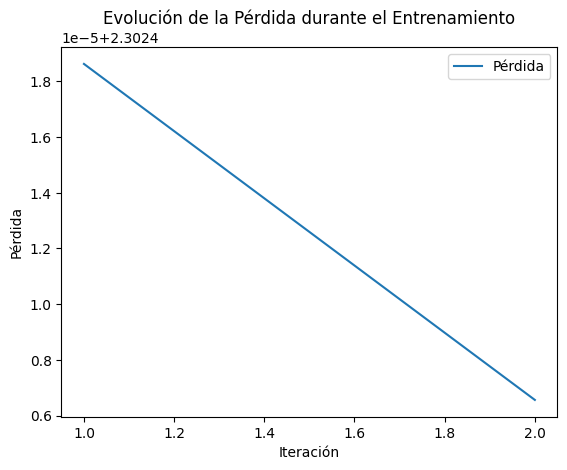

In [235]:
# Grafica
plt.plot(range(1, 3), losses, label="Pérdida")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.title("Evolución de la Pérdida durante el Entrenamiento")
plt.legend()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# **otro**

# **b - Implementación con biblioteca  Y 3 ejemplos segun mejor resultado**

Implementa un segundo clasificador para el mismo conjunto de datos utilizando scikit-learn o cualquier otra biblioteca de tu elección que facilite el desarrollo de modelos de aprendizaje automático. Compara los resultados.

División del dataset en train/test/validation Crear la arquitectura de la red. Entrenamiento Evaluación (model.evaluate) Visualizing loss and accuracy

# **1- Primer ejemplo no fue tan bueno**

La precisión es baja

la pérdida va disminuyendo

21 % de validacion



Iteration 1, loss = 5.22093457
Iteration 2, loss = 3.30562819
Iteration 3, loss = 3.02851240
Iteration 4, loss = 2.83178781
Iteration 5, loss = 2.65683235
Iteration 6, loss = 2.49634510
Iteration 7, loss = 2.35132644
Iteration 8, loss = 2.22102993
Iteration 9, loss = 2.10526507
Iteration 10, loss = 2.00206025
Accuracy en validación: 0.3000


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy en prueba: 0.2565


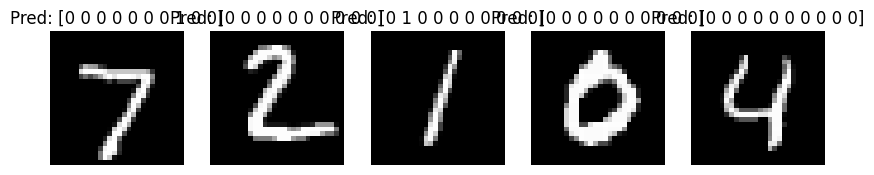

In [236]:
#importo todo de nuevo por que  presento dificultades

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# train/test/validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 1 capa oculta 128 neuronas)
clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, alpha=1e-4, solver='sgd', verbose=True, random_state=1)

# modelo
clf.fit(X_train, y_train)

#  conjunto de validación
val_predictions = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Accuracy en validación: {val_accuracy:.4f}')

#  Evaluación
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy en prueba: {test_accuracy:.4f}')

# predicciones con imagen
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {test_predictions[i]}')
    ax.axis('off')
plt.show()


# **2- segundo codigo**

el modelo clasifico bien

el modelo mejora con mas iteracciones

aprendido a clasificar correctamente

 precisión superior al 90%

Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100
Accuracy en validación: 0.9100
Accuracy en prueba: 0.9091


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


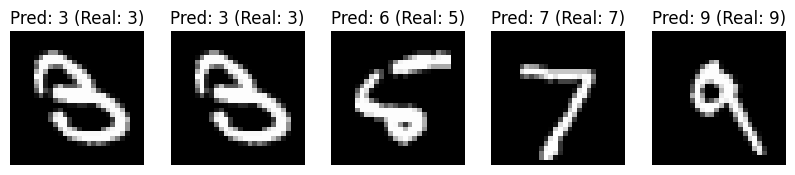

In [237]:


#  MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

#train/test/validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 1 capa oculta- 128 neuronas
clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, alpha=1e-4, solver='sgd', verbose=True, random_state=1)

# modelo
clf.fit(X_train, y_train)

#  validación
val_predictions = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Accuracy en validación: {val_accuracy:.4f}')

#  prueba
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy en prueba: {test_accuracy:.4f}')

#  imágenes para revision de existencia específicas (3, 3, 5, 7, 9)
target_digits = [3, 3, 5, 7, 9]
selected_images = []
selected_labels = []
selected_predictions = []


for digit in target_digits:
    index = np.where(y_test == digit)[0][0]
    selected_images.append(X_test[index])
    selected_labels.append(y_test[index])
    selected_predictions.append(test_predictions[index])

#  imágenes con predicciones
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {selected_predictions[i]} (Real: {selected_labels[i]})')
    ax.axis('off')

plt.show()


# **3- Ensayo de imagenes imagen 4000 del conjunto y sus cuadrantes**

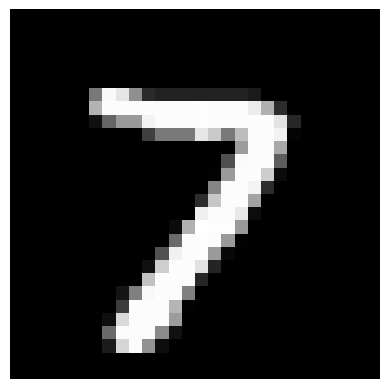

In [238]:
from tensorflow.keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()


imagen = X_train[4000]

# Mostrar
import matplotlib.pyplot as plt
plt.imshow(imagen, cmap='gray')
plt.axis('off')  # Ocultar ejes
plt.show()


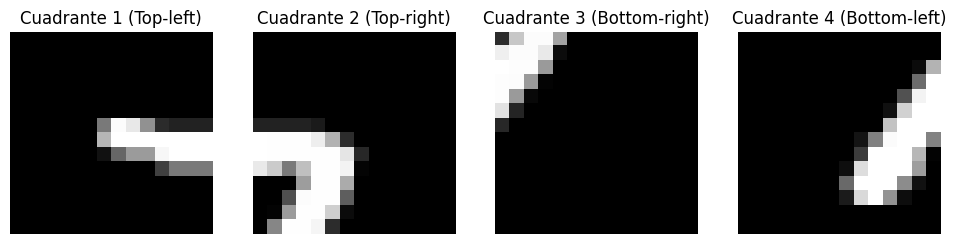

In [239]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#  imagen 4000 del conjunto
imagen = X_train[4000]

# imagen 4 cuadrantes 14x14
X1 = imagen[:14, :14]  # izquierdo
X2 = imagen[:14, 14:]  #  derecho
X3 = imagen[14:, 14:]  # derecho
X4 = imagen[14:, :14]  # izquierdo

# Visualizar los cuadrantes
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].imshow(X1, cmap='gray')
axes[0].set_title("Cuadrante 1 (Top-left)")
axes[0].axis('off')

axes[1].imshow(X2, cmap='gray')
axes[1].set_title("Cuadrante 2 (Top-right)")
axes[1].axis('off')

axes[2].imshow(X3, cmap='gray')
axes[2].set_title("Cuadrante 3 (Bottom-right)")
axes[2].axis('off')

axes[3].imshow(X4, cmap='gray')
axes[3].set_title("Cuadrante 4 (Bottom-left)")
axes[3].axis('off')

plt.show()

In [240]:
from tensorflow.keras.datasets import mnist

# Cargo denuevo  el dataset MNIST por dificultades
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#  imagen de prueba
print("Forma de una imagen de prueba:", X_test[0].shape)


Forma de una imagen de prueba: (28, 28)


# **4- GRAFICA**

**en esta grafica tambien tube problemas con las bibliotecas por eso las pomgo denuevo en cada codigo**

Pérdida Loss: line a horizontal  modelo está mejorando lento por que tiene pocas iteraciones son solo 10 .

Precisión: La línea de precisión en validación es similar a la de precisión en entrenamiento.

Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.55218694
Iteration 2, loss = 0.76905645
Iteration 3, loss = 0.56911693
Iteration 4, loss = 0.48543503
Iteration 5, loss = 0.43767736
Iteration 6, loss = 0.40623777
Iteration 7, loss = 0.38322516
Iteration 8, loss = 0.36554434
Iteration 9, loss = 0.35127438
Iteration 10, loss = 0.33909100


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


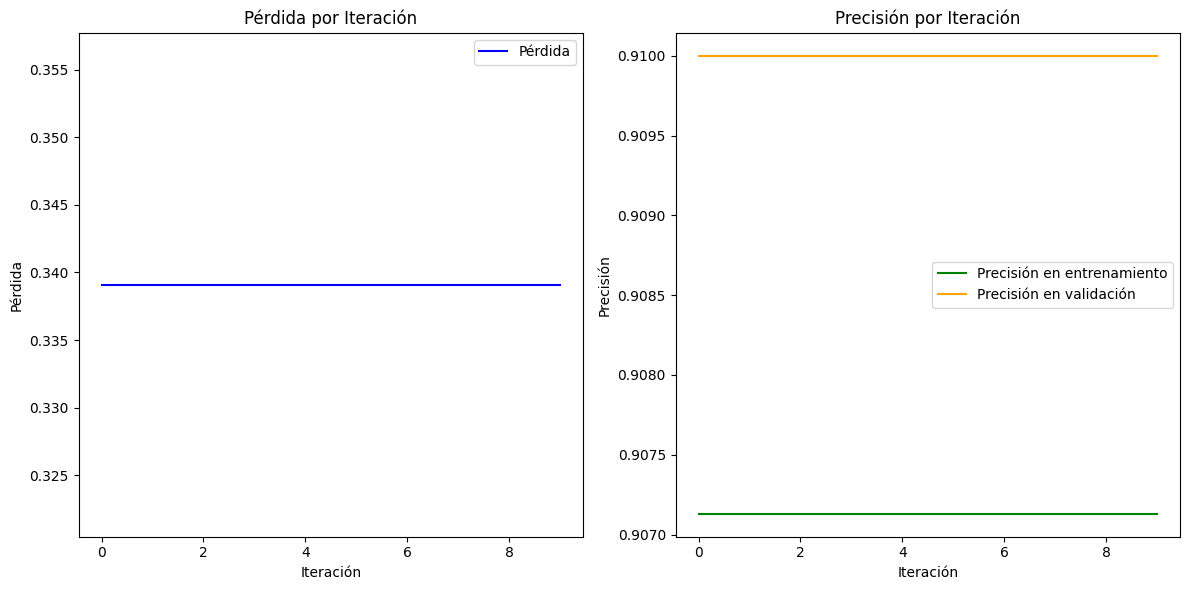

In [244]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Aplanar las imágenes y normalizarlas
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0





# train/validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#  red
clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=10, alpha=1e-4, solver='sgd', verbose=True, random_state=1)

#pérdida y precisión de las iteraciónes
loss_values = []
train_accuracy_values = []
val_accuracy_values = []

# entrenar
for i in range(10):  #  10 iteraciones
    clf.fit(X_train, y_train)

    # Almacenar
    loss_values.append(clf.loss_)

    # entrenamiento y validación
    train_accuracy_values.append(accuracy_score(y_train, clf.predict(X_train)))
    val_accuracy_values.append(accuracy_score(y_val, clf.predict(X_val)))

# Grafica pérdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_values, label="Pérdida", color='blue')
plt.title('Pérdida por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_values, label="Precisión en entrenamiento", color='green')
plt.plot(val_accuracy_values, label="Precisión en validación", color='orange')
plt.title('Precisión por Iteración')
plt.xlabel('Iteración')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

# **c- CONCLUSIONES**

El modelo manual enseña los fundamentos pero no es eficiente para proyectos grandes , dificultad para la evaluacion

Las bibliotecas  optimizan rápidamente modelos de redes neuronales ,la funcion evaluate() es rapida y mas precisa

las graficas son utiles para interpretar los resultados , como las imagenes de numeros y sus cuadrantes

En algunos codigos consulte ChatGPT por dificultades y errores



# **fin**


---------------------------------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------